In [123]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Importing Dataset - MNIST

In [124]:
data_mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data_mnist.load_data()

In [125]:
print(f"Number of training examples = {len(X_train)}")
print(f"Number of testing examples = {len(X_test)}")
print(X_train[0].shape) #The images are of 28x28 pixels and each cell shows the brightness value of 255

Number of training examples = 60000
Number of testing examples = 10000
(28, 28)


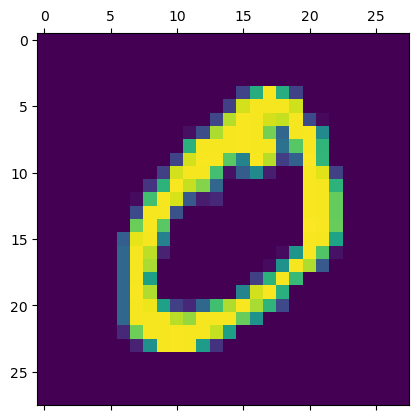

In [126]:
plt.matshow(X_train[1]) #Using matshow to represent 2d matrix as a visualisation

## Flattening our dataset
---
This is needed in order to use the brightness values in input layer

In [127]:
# Ranging each value from 0 to 1
# This increases the accuracy

X_train = X_train/255
X_test = X_test/255

In [128]:
# Using pandas to reshape the dataset

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [129]:
from keras import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy

model = Sequential([
    # Dense(15, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='linear')
])

model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True), #Note: Using this to show softmax loss calculation
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - accuracy: 0.8320 - loss: 0.6026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.9356 - loss: 0.2274
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9491 - loss: 0.1782
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.9564 - loss: 0.1539
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step - accuracy: 0.9589 - loss: 0.1379
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - accuracy: 0.9633 - loss: 0.1217
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - accuracy: 0.9673 - loss: 0.1094
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step - accuracy: 0.9695 - loss: 0.1037
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - accuracy: 0.9699 - loss: 0.1009
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.9720 - loss: 0.0959


In [130]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9533 - loss: 0.1514


[0.1307273954153061, 0.9606000185012817]

In [131]:
y_predict = model.predict(X_test_flattened)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step


array([[  1.2784007 , -14.555517  ,   0.21473977, ...,  11.344262  ,
          0.27129638,   0.16390103],
       [ -1.5478672 ,   2.8211038 ,  15.124539  , ..., -14.481632  ,
         -0.5415165 , -21.324816  ],
       [ -7.2668047 ,   5.4299607 ,  -2.271894  , ...,  -2.0667357 ,
         -1.2309479 ,  -3.5085979 ],
       ...,
       [-14.413582  ,  -9.0492115 , -10.429114  , ...,  -0.7378348 ,
          2.243544  ,   2.7101226 ],
       [ -4.2961283 , -11.50008   , -15.623412  , ...,  -7.3418727 ,
          4.0576887 ,  -8.838805  ],
       [  2.6126034 ,  -4.5436807 ,  -1.7420545 , ..., -12.264709  ,
         -7.7641525 ,  -5.2483587 ]], dtype=float32)

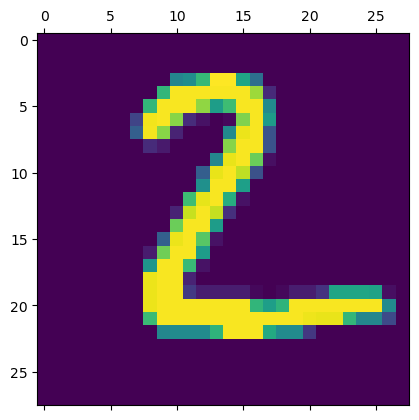

In [132]:
#Let us now check a random case

plt.matshow(X_test[1])

In [133]:
prediction = np.argmax(y_predict[577]) 

In [134]:
print(f"The predicted number for the above is: {prediction}")

The predicted number for the above is: 3


In [135]:
y_predict_labels = [np.argmax(i) for i in y_predict] #Using list comprehension to store the actual digits 
                                                             #recognised

y_predict_labels[:5]

[7, 2, 1, 0, 4]

---
## Creating a confusion matrix
This matrix shows how many times the prediction was correct (In the diagonal) and the rest shows predicted vs actual

In [136]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    1,    2,    1,    1,    2,    6],
       [   0, 1121,    3,    2,    0,    1,    2,    1,    5,    0],
       [  10,    3,  975,   10,    3,    2,    4,   16,    9,    0],
       [   0,    0,    6,  970,    0,   12,    1,   10,   10,    1],
       [   3,    0,    4,    0,  945,    0,    7,    5,    3,   15],
       [   4,    0,    1,   17,    0,  854,    4,    2,    7,    3],
       [   6,    3,    2,    1,    2,    5,  935,    1,    3,    0],
       [   1,    9,    9,    4,    3,    0,    0,  986,    0,   16],
       [   5,    3,    3,   12,    8,   20,    6,    4,  908,    5],
       [   5,    6,    0,    7,   18,   10,    0,    7,    9,  947]],
      dtype=int32)>

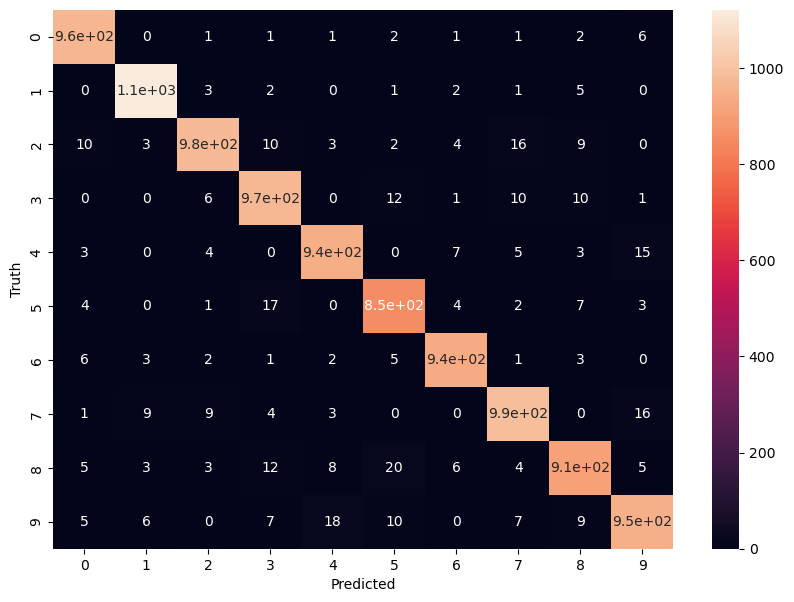

In [137]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
